In [1]:
from floor import Floor
from bike  import Bike
import numpy as np
from solver import RuKu4, Euler as run
from score import score
from evol import next_gen#, crossovers, mutations, selection

In [2]:
ground = Floor()
bike_list = [Bike() for _ in range(100)]

In [31]:
for bike in bike_list:
    run(bike, ground)
    score(bike)
bike_list.sort(key=lambda x: x.score, reverse=True)

In [32]:
len([bk for bk in bike_list]),np.max([bk.score for bk in bike_list]),np.median([bk.score for bk in bike_list])

(124, 132.8996457410069, 110.64145411488408)

In [33]:
bike_list = next_gen(bike_list,n_crosses=50,n_mutations=50)

In [6]:
from animation import Render
import time
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.patches as patches
import matplotlib.animation as animation
from copy import deepcopy

In [30]:
plt.ion()
ibike = 0

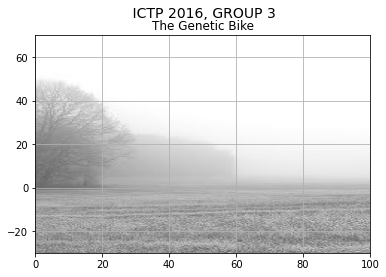

In [31]:
render = Render(ground, deepcopy(bike_list[ibike]), ibike)
ani = animation.FuncAnimation(render.fig, render.animate, init_func = render.init_line, frames = render.nframes, interval = 0.0, repeat = False, blit = True)
plt.show()


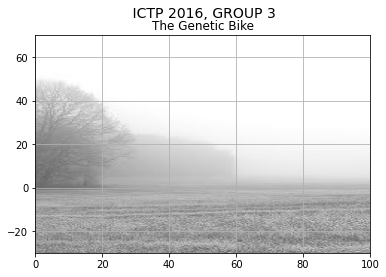

In [32]:

ender = Render(ground, bike_list[2], ibike)
ani = animation.FuncAnimation(render.fig, render.animate, init_func = render.init_line, frames = render.nframes, interval = 1.0, repeat = False, blit = True)
plt.show()



In [27]:
ani.save('teste.mp4', writer="ffmpeg")


MovieWriter ffmpeg unavailable; using Pillow instead.


ValueError: unknown file extension: .mp4

In [ ]:
ani.save('project_group3.mp4', fps=30, extra_args=['-vcodec', 'libx264'])
FFwriter = animation.FFMpegWriter()
#ani.save('teste3.mpeg', writer = FFwriter, fps = 30, extra_args=['-vcodec', 'libx264'])


In [32]:
bike_list[0].traj

array([[1.33422282e-02, 3.43282137e+02, 2.85101631e+00, ...,
        1.74847372e+00, 3.44565637e+02, 1.38098019e+00],
       [2.66844563e-02, 3.43283333e+02, 2.85006157e+00, ...,
        1.73722874e+00, 3.44565917e+02, 1.38052439e+00],
       [4.00266845e-02, 3.43285039e+02, 2.84887871e+00, ...,
        1.72199351e+00, 3.44566659e+02, 1.38026914e+00],
       ...,
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00]])

In [48]:
bike_list[0].init_pos, bike_list[0].traj[0]

(array([[223.93290718,  -5.06545808],
        [222.34451726,  -4.6712623 ],
        [221.88081512,  -6.89068326],
        [225.62566658,  -6.50280719]]),
 array([1.33422282e-02, 3.43282137e+02, 2.85101631e+00, 3.42036293e+02,
        3.42383956e+00, 3.41234939e+02, 1.74847372e+00, 3.44565637e+02,
        1.38098019e+00]))

In [49]:
bk.init_pos.shape

(4, 2)

In [55]:
bk = Bike(pos=np.array([[5.,5.],[7.,5.],[5.,3.],[7.,3.]]),mass=np.array([2,2,2,2]),k_sp=200)

In [69]:
bk.init_pos.clip(4,20)

array([[5., 5.],
       [7., 5.],
       [5., 4.],
       [7., 4.]])

In [41]:
bk.init_pos

array([[15.9169524 ,  9.80749205],
       [13.44137832,  9.69217497],
       [13.08548227, 10.        ],
       [14.31695323,  8.19464842]])

In [40]:
getattr(bk,'init_pos')[2][1]=10